In [1]:
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Phase-folding

In [13]:
tic = 'TIC 39174351'

In [ ]:
# Downloading all sectors and merged them
data = lk.search_lightcurve(tic, author='SPOC')
lc = data.download_all().stitch()

fig, ax = plt.subplots(figsize=(8,4))
lc.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)

In [14]:
# Searching available sectors
data = lk.search_lightcurve(tic, author='SPOC', exptime=120)
data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 22,2020,SPOC,120,39174351,0.0
1,TESS Sector 49,2022,SPOC,120,39174351,0.0


In [ ]:
sector = data.table['mission'][9][12:]
sector

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

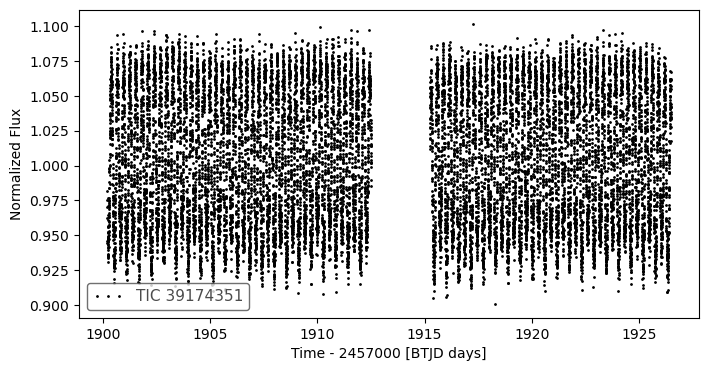

In [15]:
# Downloading one sector by time
index = 0
lc_sector = data[index].download().normalize().remove_outliers()
sector = data.table['mission'][index][12:]

fig, ax = plt.subplots(figsize=(8,4))

lc_sector.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)

In [ ]:
search_tpf = lk.search_targetpixelfile(tic, author='SPOC', exptime=120)
search_result = search_tpf[index].download()
search_result.interact()

In [16]:
time_1 = min(lc_sector.time.value)
#time_2 = 2195.796

periodogram = lc_sector.to_periodogram()
period = periodogram.period_at_max_power.value
double_period = period*2

#period = time_2 - time_1
#period = 1.8501222357054496
#double_period = period*2
print('Period: {} days'.format(period))
print('Double Period: {} days'.format(double_period))

Period: 0.2870736531671812 days
Double Period: 0.5741473063343624 days


In [12]:
def plot_folded_color(period):
    lc_phased = lc_sector.fold(period=period, epoch_time=time_1)
    fig, ax = plt.subplots(figsize=(8,5))
    plt.scatter(lc_phased.time.value, lc_phased.flux.value, c=lc_phased.time_original.value, s=1, marker='o')
    
    plt.xlabel('Phase')
    plt.ylabel('Normalized flux')
    plt.show()
    

interact(plot_folded_color, period=widgets.FloatSlider(value=double_period, min=(double_period)-0.3, max=(double_period)+0.3, step=0.001, description='period', readout_format='.5'))
#interact(plot_folded_color, period=widgets.FloatSlider(value=period, min=(period)-0.3, max=(period)+0.3, step=0.001, description='period', readout_format='.5'))

interactive(children=(FloatSlider(value=2.398310535557239, description='period', max=2.6983105355572388, min=2…

<function __main__.plot_folded_color(period)>

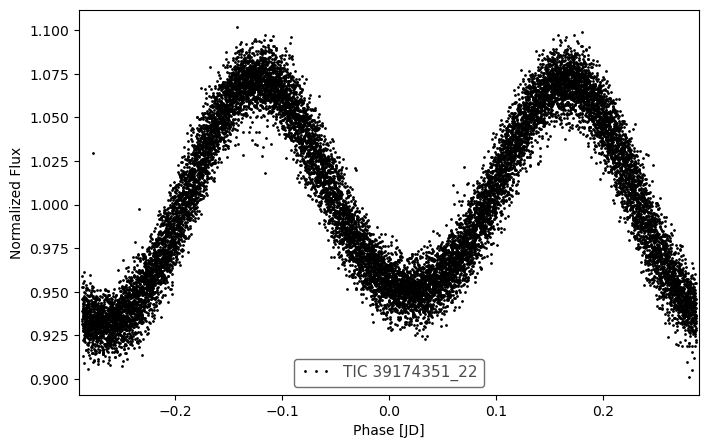

In [17]:
#calibrated_period = 3.7002444714108993

lc_phased = lc_sector.fold(period=double_period, epoch_time=time_1)

fig, ax = plt.subplots(figsize=(8,5))
lc_phased.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1, label=tic+'_'+sector)

x_min = round(min(lc_phased.time.value),2)
x_max = round(max(lc_phased.time.value),2)

plt.xlim(x_min, x_max)
    
plt.show()

# Binning

In [ ]:
bin_time = 5/24/60

lc_phased_binned = lc_phased.bin(bin_time)

lc_phased_binned.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

lc_phased.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1, label=tic+'_'+sector)
lc_phased_binned.plot(ax=ax, linewidth=2, color='r', label='Binned')

plt.xlim(x_min, x_max)
#plt.ylim(0.63, 1.43)

#plt.savefig('../../NAOS/Bstars/DR3data/MAPS_Files/377_SAMPLE/phase_folded/'+tic.split(' ')[1]+'_'+sector+'.png', dpi=400)

In [ ]:
periodogram = lc_sector.to_periodogram()
phase_period = periodogram.period_at_max_power.value
phase_period